# classification  

In [1]:
from sklearn.datasets import fetch_mldata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split

In [2]:
mnist = pd.read_csv('./MNIST/train.csv')
mnist_valid = pd.read_csv('./MNIST/test.csv')

In [3]:
def imshow(arr) :
#     print(type(arr))
    arr = arr.values.reshape((28 , 28))
    plt.imshow(arr , cmap = matplotlib.cm.binary)

In [4]:
train , test = train_test_split(mnist , test_size = 0.2 , random_state = 1234) 

In [5]:
train_features = train.drop('label' , axis=1)
train_label = train.label

test_features = test.drop('label' , axis=1)
test_label = test.label

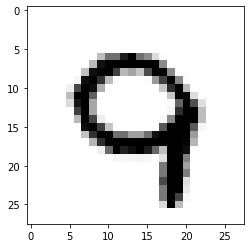

In [6]:
some_number = train_features.iloc[np.random.randint(0 , len(train_features))]
imshow(some_number)

# binary classifiers

In [7]:
train_label_5 = (train_label == 5)
test_label_5 = (test_label == 5)

In [8]:
from sklearn.linear_model import SGDClassifier

In [9]:
sgd_bin_clf = SGDClassifier(random_state=1234)
sgd_bin_clf.fit(train_features , train_label_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

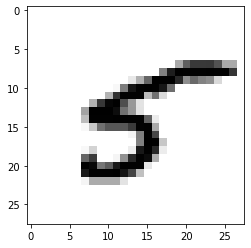

In [10]:
pred = sgd_bin_clf.predict(test_features.iloc[0:100])
pred 
imshow(test_features.iloc[21])
imshow(test_features.iloc[22])


## performace measures

In [6]:
from sklearn.model_selection import cross_val_score

In [12]:
score = cross_val_score(sgd_bin_clf , train_features , train_label_5 , cv = 3 , scoring = 'accuracy')
score

array([0.95991429, 0.96696429, 0.96356818])

## lets make a classifier of our own 

In [13]:
from sklearn.base import BaseEstimator
class non_classifier(BaseEstimator):
    def __init__(self):
        pass
    def fit(self , x = None , y = None):
        pass
    def predict(self , x):
        return np.zeros((len(x),))

In [14]:
sample_clf = non_classifier()
score = cross_val_score(sample_clf , train_features , train_label_5 , cv =3 , scoring = 
                       'accuracy')
score

array([0.91303571, 0.908125  , 0.90821429])

In [15]:
from sklearn.linear_model import SGDClassifier

# confusion matrix

In [16]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(sgd_bin_clf , train_features , train_label_5 , cv = 4)

In [17]:
from sklearn.metrics import confusion_matrix
confus_mat = confusion_matrix(train_label_5 , pred)
sgd_bin_clf.classes_
confus_mat

array([[29915,   654],
       [  790,  2241]])

# precision , recall and f1 scores 

In [18]:
from sklearn.metrics import precision_score , recall_score , f1_score

In [19]:
precision_score(train_label_5 , pred)

0.7740932642487046

In [20]:
recall_score(train_label_5 , pred)

0.7393599472121412

In [21]:
f1_score(train_label_5, pred)

0.7563280458994261

### constum threshold for decision function of SGD classifier

In [22]:
decision_scores = sgd_bin_clf.decision_function(train_features)
th = 0
pred_costum_th = decision_scores > th

In [23]:
decision_score  = cross_val_predict(sgd_bin_clf , train_features  ,train_label_5 , cv =3 , 
                                   method='decision_function')
from sklearn.metrics import precision_recall_curve
precisions , recalls , ths = precision_recall_curve(train_label_5 , decision_scores)

In [24]:
def plot_precision_recall_th_curve(precisions , recalls , ths):
    plt.plot(ths , precisions[:-1] , '--r' , label = 'precision')
    plt.plot(ths , recalls[:-1] , '-g' , label = 'recall')
    plt.legend()
    plt.xlabel('threshold')
    plt.ylabel('precision vs recall')

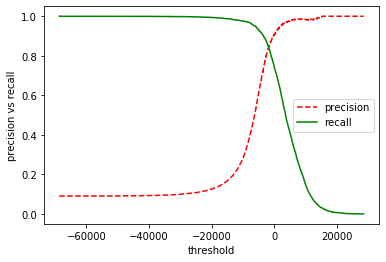

In [25]:
plot_precision_recall_th_curve(precisions , recalls , ths)

# ROC(reciever operating characteristic) curve 

In [26]:
from sklearn.metrics import roc_curve

In [27]:
fpr , tpr , th = roc_curve(train_label_5 , decision_scores)

In [28]:
def plot_roc_curve(fpr , tpr , label='roc curve' , title = None , helper_curves = True):
    plt.plot(fpr , tpr  ,label = label)
    plt.title(title)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    if helper_curves :
        x = np.linspace(0,1,10)
        y = np.ones((10,))
        plt.plot(x,y ,'--g' , label = 'perfect classifier')
        plt.plot(x,x,'--r' , label='random classifier')
    plt.grid()

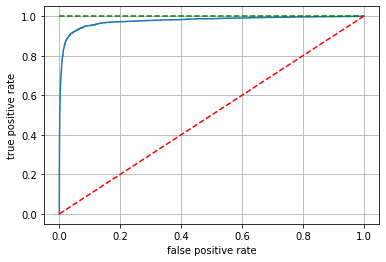

In [29]:
plot_roc_curve(fpr , tpr)

## ROC AUC (area under curve)
we want this score be as high as 1(perfect classifier) and vay far from 0.5(random classifier)

In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
roc_auc = roc_auc_score(train_label_5 , decision_scores)
roc_auc

0.9771530381765343

# Random Forest Classifier 

In [32]:
from sklearn.ensemble import RandomForestClassifier 

In [33]:
forest_clf = RandomForestClassifier(random_state = 1234)
# forest_clf.fit(train_features  ,train_label_5)
forest_probs = cross_val_predict(forest_clf , train_features , train_label_5 ,cv = 3 ,
                                 method='predict_proba')

/home/sajad/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sajad/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sajad/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


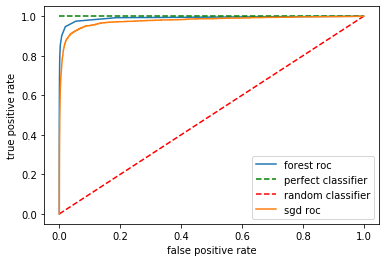

In [34]:
forest_scores = forest_probs[:,1]
fpr_forest  ,tpr_forest , th = roc_curve(train_label_5 , forest_scores)
plot_roc_curve(fpr_forest , tpr_forest , label = 'forest roc')
plot_roc_curve(fpr , tpr , label = 'sgd roc' , helper_curves=False)
plt.legend()
plt.show()


In [35]:
roc_auc_score(train_label_5 , forest_scores)

0.9912744843784886

lets take a look at precision/recall graph too

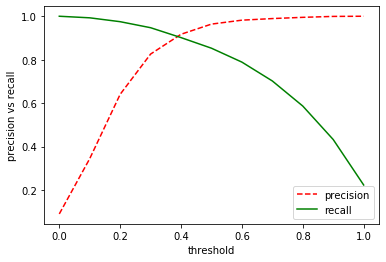

In [36]:
precision_forest , recall_forest , th = precision_recall_curve(train_label_5 , forest_scores)
plot_precision_recall_th_curve(precision_forest , recall_forest , th)

compute precision and recall scores 

In [37]:
pred = cross_val_predict(forest_clf , train_features , train_label_5 , cv =3)
pre_score = precision_score(train_label_5 , pred)
recall_score = recall_score(train_label_5 , pred)
print(pre_score  ,recall_score)

/home/sajad/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sajad/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sajad/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9819301848049281 0.788848564830089


# Multiclass classifiers

In [38]:
sgd_clf = SGDClassifier(random_state=1234)
sgd_clf.fit(train_features , train_label)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

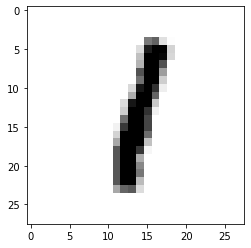

In [39]:
some_digit = train_features.iloc[10]
some_digit = some_digit.values.reshape(1,len(some_digit))
sgd_clf.predict(some_digit)
imshow(train_features.iloc[10])
some_digit_scores = sgd_clf.decision_function(some_digit)
np.argmax(some_digit_scores)
sgd_clf.classes_

## force OVO(one vs one)  / OVR(one vs rest) to sklearn

In [40]:
from sklearn.multiclass import OneVsOneClassifier

In [41]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=123))
ovo_clf.fit(train_features , train_label)
ovo_clf.predict(some_digit)

array([1])

In [42]:
len(ovo_clf.estimators_)

45

In [43]:
forest_clf.fit(train_features , train_label)
forest_clf.predict_proba(some_digit)

/home/sajad/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [44]:
cross_val_score(forest_clf , train_features , train_label,scoring='accuracy' , cv = 3)

array([0.93162546, 0.93580357, 0.93007055])

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features.astype(np.float64))
cross_val_score(forest_clf , train_features_scaled , train_label , cv = 3 , scoring='accuracy')

array([0.93135767, 0.93571429, 0.93015986])

# Error Analysis 

In [46]:
pred = cross_val_predict(sgd_clf , train_features , train_label ,cv=3)
conf_mat = confusion_matrix(train_label , pred)
conf_mat

array([[3158,    0,   29,   12,   13,   28,   24,    0,   33,   13],
       [   3, 3594,   49,   13,    6,   21,   11,    8,   77,   10],
       [  50,   24, 2919,   64,   54,   21,   63,   32,   86,   20],
       [  33,   11,  134, 2891,   10,  169,   19,   16,  120,   52],
       [  22,    9,   34,   14, 2943,   10,   16,    6,   38,  148],
       [  48,   14,   38,  121,   55, 2372,   70,   13,  246,   54],
       [  44,    4,   49,    4,   29,   58, 3108,    2,   30,    3],
       [  15,   11,   89,   40,   69,   21,    1, 2995,   28,  253],
       [  35,   43,   97,   96,   76,  210,   32,   10, 2581,   92],
       [  23,    9,   25,   76,  413,   79,    1,   98,   65, 2525]])

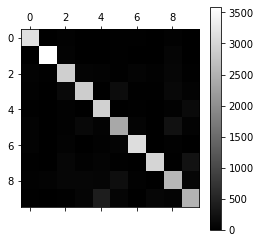

In [47]:
plt.matshow(conf_mat , cmap = plt.cm.gray)
plt.colorbar()

In [48]:
pred = cross_val_predict(forest_clf , train_features , train_label , cv=3)
conf_mat = confusion_matrix(train_label ,pred)
conf_mat

array([[3227,    1,    9,    5,    7,   10,   21,    0,   25,    5],
       [   2, 3726,   20,   10,    7,    5,    5,    8,    8,    1],
       [  28,   19, 3118,   35,   24,    6,   17,   39,   38,    9],
       [  13,   17,   78, 3134,    9,   80,    9,   34,   59,   22],
       [   7,   15,   20,    6, 3044,    6,   21,   12,   15,   94],
       [  31,   14,   16,  133,   17, 2727,   32,    6,   35,   20],
       [  35,    6,   27,    3,   22,   34, 3193,    0,   11,    0],
       [  12,   24,   57,   16,   39,    4,    1, 3301,   13,   55],
       [  24,   35,   51,   84,   46,   59,   22,   11, 2895,   45],
       [  23,   12,   12,   61,  115,   30,    5,   62,   27, 2967]])

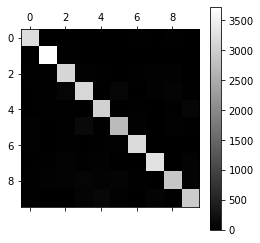

In [49]:
plt.matshow(conf_mat , cmap = plt.cm.gray)
plt.colorbar()

## normalize the confusion matrix 

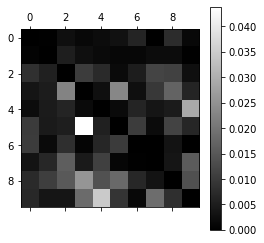

In [50]:
    row_sums = conf_mat.sum(axis =  1 , keepdims = True)
    conf_mat_normal = conf_mat/row_sums
    np.fill_diagonal(conf_mat_normal , 0)
    plt.matshow(conf_mat_normal , cmap = plt.cm.gray)
    plt.colorbar()

# Multiple Classification 

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
train_label_larg = (train_label > 6)
train_label_odd = (train_label % 2 == 1)
train_label_mul = np.c_[train_label_larg , train_label_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(train_features , train_label_mul)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
knn_clf.predict(some_digit)

array([[False,  True]])

In [54]:
# knn_pred = iicross_val_predict(knn_clf , train_features , train_label_mul , cv = 3)
# score = f1_score(train_label_mul , knn_pred , average = 'macro')
# score

# Multioutput Clissification 

In [56]:
noise_train = np.random.randint(0,100,(len(train_features),784))
noise_test = np.random.randint(0,100,(len(test_features) , 784))
train_features_mod = train_features + noise_train
test_features_mod = test_features + noise_test
train_label_mod = train_features
test_label_mode = test_features


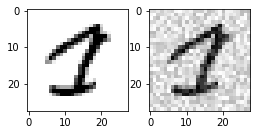

In [57]:
plt.figure(figsize = (4,8))
plt.subplot(1,2,1)
imshow(train_features.iloc[100])
plt.subplot(1,2,2)
imshow(train_features_mod.iloc[100])

In [65]:
knn_clf.fit(train_features_mod, train_label_mod)
clean_digit = knn_clf.predict(train_features_mod.iloc[100].values.reshape
                              (1,len(train_features_mod.iloc[100])))
clean_digit.shape


(1, 784)

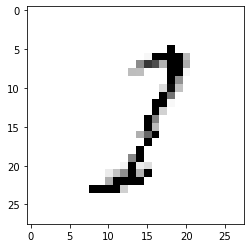

In [79]:
# imshow(clean_digit)
imshow(pd.Series(clean_digit.T[:,0]))

# Exercies 

In [8]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_features , train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
score = cross_val_score(knn_clf , train_features , train_label , cv = 2 , scoring = 'accuracy')
score

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_param = [{'folan':[1,2,3]},{}]

grid_search = GridSearchCV(knn_clf , grid_param , cv=1 , scoring = 'neg_mean_squared_error')